In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
from aps_ai.beamline34IDC.util.shadow.common import \
    plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution,\
    load_shadow_beam, PreProcessorFiles, EmptyBeamException
from aps_ai.beamline34IDC.optimization import movers, configs, display_utils, common as opt_common
from aps_ai.beamline34IDC.util import clean_up
from aps_ai.beamline34IDC.optimization.openai_rl_gym import AdaptiveCameraEnv, FixedCameraEnv

import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm
import shutil
import glob
import IPython
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

In [3]:
DEFAULT_RANDOM_SEED = np.random.randint(100000)
print(DEFAULT_RANDOM_SEED)

19446


In [4]:
base_dir = '/gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/'
orig_work_dir = f'{base_dir}/work_directory'
temp_work_dir = f'{base_dir}/tmp_work_dir_{DEFAULT_RANDOM_SEED}'

In [5]:
os.mkdir(temp_work_dir)

In [6]:
dat_files = glob.glob(f'{orig_work_dir}/*.dat') + glob.glob(f'{orig_work_dir}/*.ini')
for df in dat_files:
    shutil.copy(df, temp_work_dir)

In [7]:
os.chdir(temp_work_dir)

In [8]:
input_beam_path = "primary_optics_system_beam.dat"

In [42]:
move_motors = ['hkb_4', 'vkb_4', 'hkb_3', 'vkb_3']

In [62]:
# Focusing Optics System -------------------------
focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path, bender=True)

In [63]:
env = FixedCameraEnv(focusing_system, 
                     move_motors, 
                     random_seed=DEFAULT_RANDOM_SEED, 
                     loss_parameters=['centroid', 'fwhm'], 
                     verbose=True, 
                     camera_yrange=[-0.5, 0.5], 
                     camera_xrange=[-0.5, 0.5], 
                     camera_nbins=512)

env.set_initialization_range_per_motor([[-0.020, 0.020], 
                                        [-0.020, 0.020],
                                        [-0.001, 0.001],
                                        [-0.001, 0.001]])

In [59]:
check_env(env)

Initial guess [0.00400339660568581, 0.014633780580114119, 0.0004420989984793384, -0.0009420631518239122] has loss 0.018424411095683758
Current loss is 0.07633939240582938 at counter 0
Current loss is 0.05838870031113181 for action [8 6 9 0] at 1


In [64]:
model = PPO("MultiInputPolicy", env, verbose=1, n_steps=100)
model.learn(total_timesteps=1000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/stable_baselines3/ppo/ppo.py:141: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 100`, after every 1 untruncated mini-batches, there will be a truncated mini-batch of size 36
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=100 and n_envs=1)
  f"You have specified a mini-batch size of {batch_size},"


Initial guess [0.015784269485173346, -0.00970988514259609, -0.0001843595326331708, 0.0003301797941915694] has loss 0.018982698989443405
Current loss is 0.040076200234817935 at counter 0
Current loss is 0.056515543962041365 for action [ 9  0 10  3] at 1
Current loss is 20000.0 for action [18  3 19  2] at 2
Initial guess [-0.0031807508987413725, 0.008818401819242153, -0.0005637509796225587, -0.0009874980568346414] has loss 0.012555280973728742
Current loss is 0.018614643825229735 at counter 2
Current loss is 0.017513966667740258 for action [6 2 2 7] at 3
Current loss is 0.015504891461902728 for action [15 13  3  2] at 4
Current loss is 0.01812957434866073 for action [ 1  3  8 16] at 5
Current loss is 0.01682313452273739 for action [ 7  2 11  1] at 6
Current loss is 0.01675520627109068 for action [14  2 12 16] at 7
Current loss is 0.04307542810955318 for action [ 5  0 16 12] at 8
Current loss is 0.05072963598432605 for action [14  7 13 15] at 9
Current loss is 0.051355863519378105 for act

KeyboardInterrupt: 

In [78]:
env.reset()

Initial guess [0.018206169978212814, -0.009672271706150917, -0.0002699022296790501, 2.8708428737540597e-05] has loss 0.02070208100475285
Current loss is 0.04507096595414456 at counter 646


{'data_2D': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)}

In [79]:
obs, reward, done, info = env.step([5,1,3,2])

Current loss is 0.0558368162337277 for action [5, 1, 3, 2] at 647


In [81]:
for i in range(10):
    while True:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        if done: break
    

Current loss is 0.05558014300258611 for action [ 4  7 10 18] at 648
Current loss is 20000.0 for action [17  0  9  2] at 649
Current loss is 20000.0 for action [14 15  2  6] at 650
Current loss is 0.0683048410142385 for action [14 15  2  6] at 651
Current loss is 0.05489133604094669 for action [11 19  2 11] at 652
Current loss is 0.07725772531175462 for action [15  0  8 11] at 653
Current loss is 0.06996960629868593 for action [ 8 17 19  0] at 654
Current loss is 0.09194307945966354 for action [14  4 18 11] at 655
Current loss is 0.07591008045848555 for action [ 1  9  7 19] at 656
Current loss is 0.08972338861726926 for action [13  9 14  1] at 657
Current loss is 0.08573764995897176 for action [ 3 10  5 13] at 658
Current loss is 0.08894716242354528 for action [19 13 16  7] at 659
Current loss is 0.0781674981002262 for action [ 5 16  7  1] at 660
Current loss is 0.08958648496372593 for action [16 15 16  6] at 661
Current loss is 0.046328498319139134 for action [ 3 14  8  1] at 662
Curre

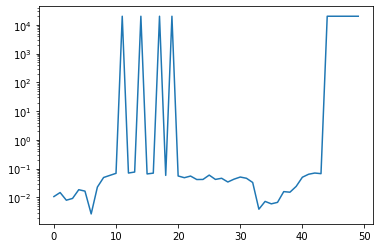

In [77]:
plt.plot(env.optimizer._opt_trials_losses[-50:])
plt.yscale('log')